## Cyberpunk theme for Julia with Makie

Porting over a matplotlib cyberpunk theme for Julia with Makie

Original article: https://matplotlib.org/matplotblog/posts/matplotlib-cyberpunk-style/

In [1]:
using CairoMakie

# CairoMakie.activate!(type = "svg")

Theming in `makie` is as simple as: https://makie.juliaplots.org/v0.17.3/documentation/theming/

```julia
fontsize_theme = Theme(fontsize=10, resolution=(300,300))
set_theme!(fontsize_theme)

f = Figure()
lines!(f, cumsum(randn(50)))
```

After taking a liking to matplotlib, I started to revisit Julia's `Makie` package because it felt similar in how you constructed a plot. But I wanted to make the plots look better just out of the box, and the way to do that was with themes. 

Let's see an example:

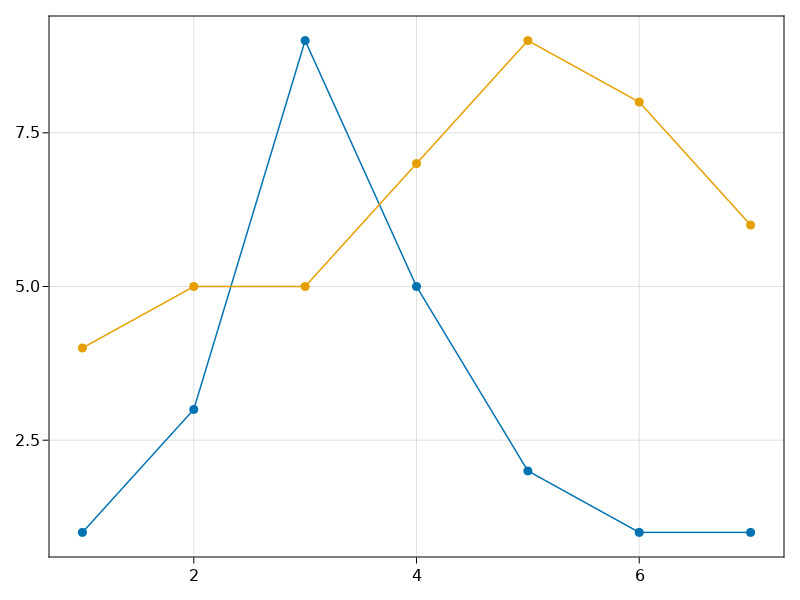

In [2]:
set_theme!()

function example_plot()
    f = Figure()
    ax = Axis(f[1,1])
    x = [1,3,9,5,2,1,1]
    y = [4,5,5,7,9,8,6]
    scatterlines!(ax, x)
    scatterlines!(ax, y)
    f
end

example_plot()

On my MBP, the default theme with makie isn't aesthetically pleasing - the font size is way too big and the figure size is massive. Let's fix those with a basic theme:

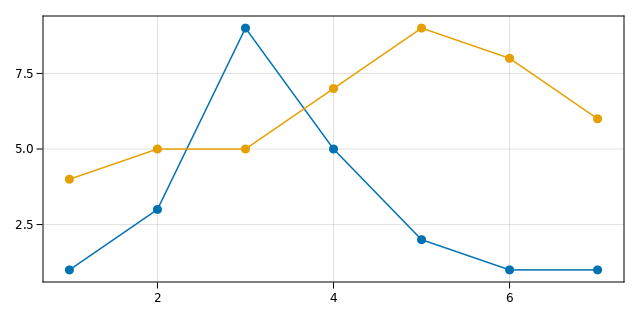

In [3]:
first_theme = Theme(fontsize=12, resolution=(640,320))
set_theme!(first_theme)

example_plot()

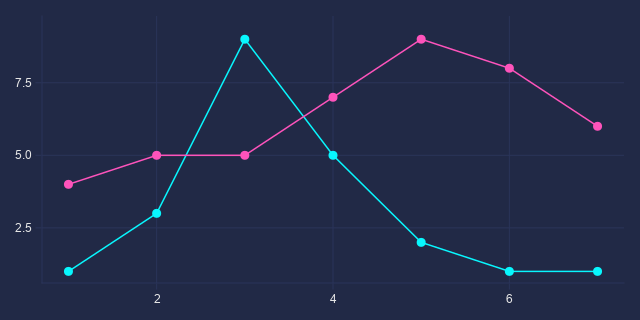

In [4]:
cyberpunk_theme = Theme(
        # teal/cyan, pink, yellow, matrix green, red, violet
        palette = (color =["#08F7FE", "#FE53BB", "#F5D300", "#00ff41", :red, "#9467bd"],),
        backgroundcolor = "#212946",
        textcolor=:gray90,
        resolution=(640,320),
        fontsize=12,
        font = "Arial",
        colormap = :cool,
        cycle = Cycle([:color]),
        Axis = ( 
            backgroundcolor = "#212946",
            topspinevisible = false,
            rightspinevisible = false,
            xgridcolor = "#2A3459",
            ygridcolor = "#2A3459",
            bottomspinecolor = "#2A3459",
            leftspinecolor = "#2A3459",
            ytickcolor = "#2A3459",
            xtickcolor = "#2A3459",
            titlesize=16,
            yautolimitmargin=(0.05, 0.1), # Leaves room for label text
            ),
        # Note in order to apply specific settings to plot types we need to use the Struct/type
        # so to theme barplots() you need to use the BarPlot type
        Lines = (
            linewidth=2,),
        BarPlot = (
            cycle=Cycle([:color]), # Interesting that I have to put it here
            label_size=12,
        )
)

with_theme(example_plot, cyberpunk_theme, )


Note in order to apply specific settings to plot types we need to use the Struct/type so to theme barplots() you need to use the BarPlot type. This wasn't covered in the documentation and it was weird that I had to repeat the `cycle` call for `BarPlot` but not `Lines`, so maybe to be safe you may have to repeat yourself here and there.

Next, let's temporarily add the glow to this example plot. This is done by repeatedly overdrawing the lines and markers (with `scatterlines`) but with a slight dodge effect with a very low alpha


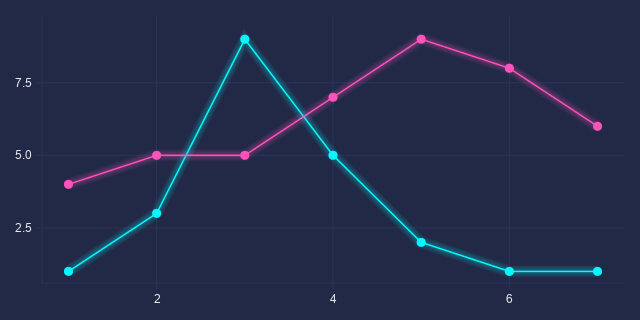

In [5]:
set_theme!(cyberpunk_theme)

n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.03

f = Figure()
ax = Axis(f[1,1])

colors = ["#08F7FE", "#FE53BB", "#F5D300", "#00ff41", :red, "#9467bd"]

x = [1,3,9,5,2,1,1]
y = [4,5,5,7,9,8,6]

scatterlines!(ax, x)
scatterlines!(ax, y)

for n in 1:n_lines
    scatterlines!(ax, x; linewidth=2+(diff_linewidth*n), color = (colors[1], alpha_value))
    scatterlines!(ax, y; linewidth=2+(diff_linewidth*n), color = (colors[2], alpha_value))
end

f

And here we have a decent start towards a better makie theme!

We also added a colormap in there, so we can handle continuous values as well:

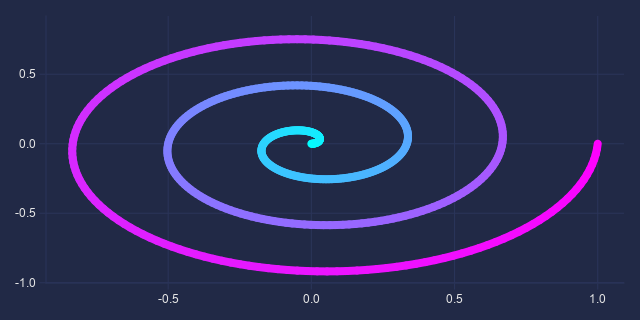

In [6]:
t = range(0, stop=1, length=500) # time steps

θ = (6π) .* t    # angles

x = t .* cos.(θ) # x coords of spiral
y = t .* sin.(θ) # y coords of spiral

p1 = lines(
    x,
    y,
    color = t,
    # colormap = :cool,
    linewidth=8)

And here's an example with a `BarPlot` where we cycle through the palette:

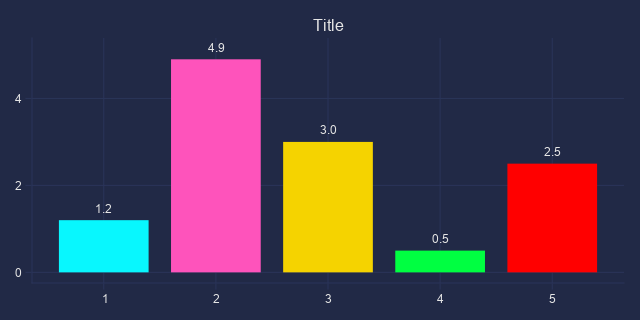

In [7]:
y = round.(randn(5) .+ 2.5, digits=1)

b = Figure()
ax = Axis(b[1,1], title="Title")
for i in 1:5
    barplot!(ax, [i], [y[i]], bar_labels=[y[i]])
end
b

Though it may be better to just use the `color` parameter and pull from the continuous color map.

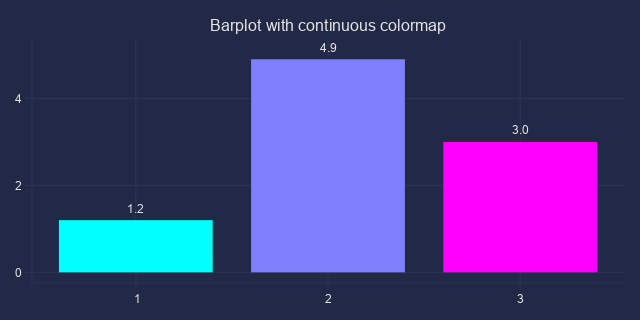

In [8]:
barplot(1:3, y[1:3], bar_labels=y[1:3], color=1:3, axis = (title="Barplot with continuous colormap",))

This looks better than the discrete colors. Note in the above example, I used `boxplot` instead of the mutating function `boxplot!` and note the *trailing comma* in the `axis` parameter call to make sure this creates a `NamedTuple`. Nuance!

From the docs:

> If you set only one attribute, be careful to do axis = (key = value,) (note the trailing comma), otherwise you're not creating a `NamedTuple` but a local variable key.